Cargamos las bibliotecas usuales de Python `numpy`, `matplotlib.pyplot`. Además de `networkx` que es específica para trabajar con gráficas. `combinations`, `random` y `choice` nos ayudarán a generar algunas gráficas.  

También definimos dos funciones para obtener los eigenvalores y eigenvectores de una matriz de forma ordenada. Y una función para elevar una matriz a una potencia dada. 

In [1]:
import numpy as np
from numpy import linalg as al
import networkx as nx
#import matplotlib.pyplot as plt

#from itertools import combinations
#from random import random , choice

def eigenvalores(A):
    av=list(al.eigh(A))

    av[0]=av[0].astype(float)
    av[1]=av[1].astype(float)

    for i in range(len(av[0]-1)):
        av[0][i]=round(float(av[0][i]),8)
    
    return np.sort(av[0])

def eigenvectores(A):
    av=list(al.eigh(A))

    av[1]=av[1].astype(float)

    for i in range(len(av[1]-1)):
        for j in range(len(av[1][i]-1)):
            av[1][i][j]=round(float(av[1][i][j]),8)
    return av[1].T

def potencia(matriz,n):
    temp=matriz
    for i in range(n-1):
        matriz=matriz.dot(temp)
    return(matriz)
    

Con `networkx` podemos declarar una gráfica, enlistando sus vértices y sus aristas. El comando `draw_networkx` devuelve una representación de la gráfica. El ejemplo de abajo, aunque se ve diferente a primera vista, corresponde a exactamente la misma gráfica de la figura 1 en las notas.

Los vértices: ['a', 'b', 'c', 'd', 'e']
Las aristas: [('a', 'b'), ('a', 'd'), ('a', 'e'), ('b', 'c'), ('b', 'd'), ('b', 'e'), ('c', 'd')]


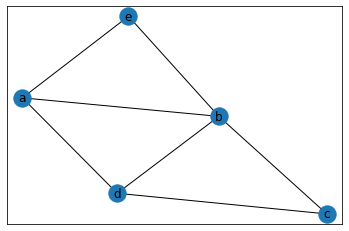

In [5]:
G=nx.Graph()
G.add_nodes_from(['a','b','c','d','e'])
G.add_edges_from([('a','b'),('b','c'),('a','d'),('a','e'),('b','d'),('b','e'),('c','d')])
nx.draw_networkx(G)

print('Los vértices:', G.nodes())
print('Las aristas:',G.edges())

En `networkx` se incluyen muchos ejemplos ya guardados de gráficas. Por mostrar algunos de los más usuales: gráficas completas, caminos y ciclos. 

NodeView((0, 1, 2, 3))

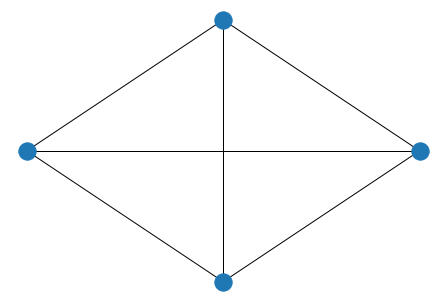

In [6]:
G1=nx.complete_graph(4)
nx.draw_circular(G1)
G1.nodes()

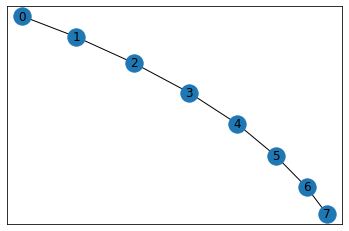

In [12]:
G2=nx.path_graph(8)
nx.draw_networkx(G2)

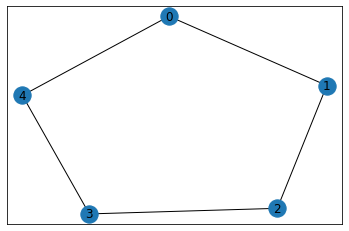

In [18]:
G3=nx.cycle_graph(5)
nx.draw_networkx(G3)

La matriz de adyacencia de la gráfica `G`

In [19]:
A=(nx.adjacency_matrix(G))
print(type(A))
A=A.toarray()
print(A)
print(type(A))

<class 'scipy.sparse.csr.csr_matrix'>
[[0 1 0 1 1]
 [1 0 1 1 1]
 [0 1 0 1 0]
 [1 1 1 0 0]
 [1 1 0 0 0]]
<class 'numpy.ndarray'>


Las entradas en la diagonal principal de una matriz de adyacencia al cuadrado, son iguales a los grados de los vértices. ¿Por qué sucede esto?

[[3 2 2 1 1]
 [2 4 1 2 1]
 [2 1 2 1 1]
 [1 2 1 3 2]
 [1 1 1 2 2]]


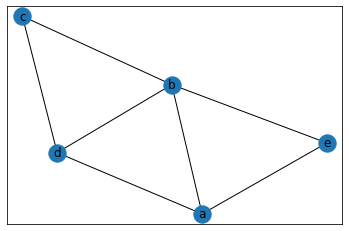

In [20]:
nx.draw_networkx(G)
A2=potencia(A,2)
print(A2)

Ahora elevamos al cubo a la matriz de adyacencia. Las entradas de la matriz son el número de caminos de longitud tres que empiezan y terminan en los vértices correspondientes. En particular la entrada correspondiente a cada vértice en la diagonal principal es el doble del número de triángulos que pasan por el vértice. ¿Por qué?

[[4 7 3 7 5]
 [7 6 6 7 6]
 [3 6 2 5 3]
 [7 7 5 4 3]
 [5 6 3 3 2]]


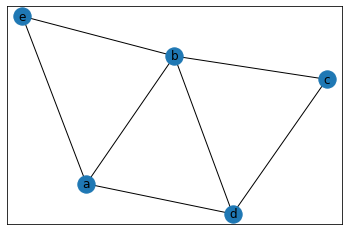

In [21]:
nx.draw_networkx(G)
A3=potencia(A,3)
print(A3)


En particular, la traza de la matriz de adyacencia al cuadrado es igual a la suma de los grados de los vértices de la gráfica. 
Pero la traza es invariante bajo cambio de base, por lo que la traza de `A^2` es la suma de sus eigenvalores 
(que son los cuadrados de los eigenvalores de `A`). Veamos eso en nuestro ejemplo.
                                                                                                              . 

In [22]:
eigenvals=eigenvalores(A)
print('Los eigenvalores de A son', eigenvals)
print('Su suma es igual a',round(sum(eigenvals),5))
print('Los de A^2 son', np.sort(eigenvals**2))
print('La suma de estos últimos es precisamente', round(sum(eigenvals**2),5),'que es la suma de los grados de los vértices')
print('Los de A^3 son', np.sort(eigenvals**3))
print('La suma de estos últimos es', round(sum(eigenvals**3),5),'que es seis veces el número de triángulos que hay en la gráfica')

Los eigenvalores de A son [-1.61803399 -1.47283391 -0.46259842  0.61803399  2.93543233]
Su suma es igual a -0.0
Los de A^2 son [0.2139973  0.38196601 2.16923973 2.61803399 8.61676296]
La suma de estos últimos es precisamente 14.0 que es la suma de los grados de los vértices
Los de A^3 son [-4.23606799 -3.19492983 -0.09899481  0.23606798 25.29392458]
La suma de estos últimos es 18.0 que es seis veces el número de triángulos que hay en la gráfica


Se pueden obtener los eigenvalores del operador de adyacencia, directamente de la gráfica y sin necesidad de definir la matriz. El comando `adjacency_spectrum` de la biblioteca `networkx` hace eso. Los comandos `numpy.sort` y `numpy.real` se agregan solo con fin de presentación.

In [23]:
print('Los eigenvalores de G son', np.sort(np.real(nx.adjacency_spectrum(G))))
print('Los eigenvalores de la gráfica completa K4 son', np.sort(np.real(nx.adjacency_spectrum(G1))))
print('Los eigenvalores del camino P8 son', np.sort(np.real(nx.adjacency_spectrum(G2))))
print('Los eigenvalores del ciclo C5 son', np.sort(np.real(nx.adjacency_spectrum(G3))))

Los eigenvalores de G son [-1.61803399 -1.47283391 -0.46259842  0.61803399  2.93543233]
Los eigenvalores de la gráfica completa K4 son [-1. -1. -1.  3.]
Los eigenvalores del camino P8 son [-1.87938524 -1.53208889 -1.         -0.34729636  0.34729636  1.
  1.53208889  1.87938524]
Los eigenvalores del ciclo C5 son [-1.61803399 -1.61803399  0.61803399  0.61803399  2.        ]


Hacemos ejercicios similares con otra gráfica

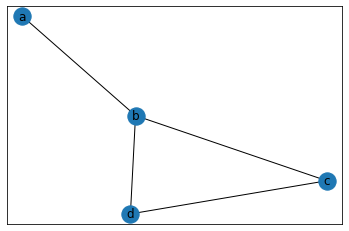

In [38]:
Gtemp=nx.Graph()
Gtemp.add_nodes_from(['a'])
Gtemp.add_nodes_from(nx.complete_graph(['b','c','d']).nodes)
Gtemp.add_edges_from(nx.complete_graph(['b','c','d']).edges)
Gtemp.add_edges_from([('a','b')])
nx.draw_networkx(Gtemp)


In [44]:
A=(nx.adjacency_matrix(Gtemp))
A=A.toarray()
print(A)

[[0 1 0 0]
 [1 0 1 1]
 [0 1 0 1]
 [0 1 1 0]]


[[1 0 1 1]
 [0 3 1 1]
 [1 1 2 1]
 [1 1 1 2]]


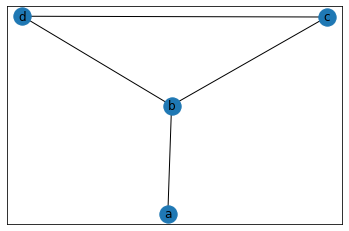

In [45]:
nx.draw_networkx(Gtemp)
A2=potencia(A,2)
print(A2)

[[0 3 1 1]
 [3 2 4 4]
 [1 4 2 3]
 [1 4 3 2]]


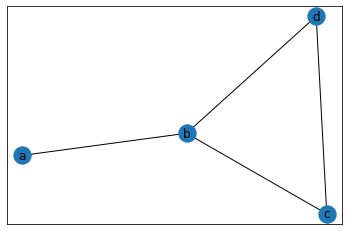

In [46]:
nx.draw_networkx(Gtemp)
A3=potencia(A,3)
print(A3)

In [47]:
print(eigenvalores(A))
print(round(sum(eigenvalores(A)),5))
print(eigenvalores(A2))
print(sum(eigenvalores(A2)))
print(eigenvalores(A3))
print(sum(eigenvalores(A3)))

[-1.4811943  -1.          0.31110782  2.17008649]
0.0
[0.09678807 1.         2.19393657 4.70927536]
8.0
[-3.24964635 -1.          0.03011153 10.21953482]
6.0


Los eigenvectores de la matriz de adyacencia (normalizados).


In [48]:
print(eigenvectores(A))

[[-0.50593666  0.74939049 -0.30202814 -0.30202814]
 [-0.          0.         -0.70710678  0.70710678]
 [ 0.81522474  0.25362279 -0.36816036 -0.36816036]
 [-0.2818452  -0.61162846 -0.52272073 -0.52272073]]


Nos asomamos un poco al laplaciano de esta última gráfica. Su espectro en este caso parece <<portarse mejor>> que para el operador de adyacencia.

In [55]:
L=nx.laplacian_matrix(Gtemp)
print(type(L))
L=L.toarray()
print(L)

<class 'scipy.sparse.csr.csr_matrix'>
[[ 1 -1  0  0]
 [-1  3 -1 -1]
 [ 0 -1  2 -1]
 [ 0 -1 -1  2]]


In [58]:
print('Los eigenvalores del laplaciano',eigenvalores(L))
print('Eigenvectores normalizados',eigenvectores(L))


Los eigenvalores del laplaciano [-0.  1.  3.  4.]
Eigenvectores normalizados [[-0.5        -0.5        -0.5        -0.5       ]
 [-0.81649658 -0.          0.40824829  0.40824829]
 [ 0.          0.         -0.70710678  0.70710678]
 [ 0.28867513 -0.8660254   0.28867513  0.28867513]]


In [24]:
L=nx.laplacian_matrix(G)
print(type(L))
L=L.toarray()
print(L)

<class 'scipy.sparse.csr.csr_matrix'>
[[ 3 -1  0 -1 -1]
 [-1  4 -1 -1 -1]
 [ 0 -1  2 -1  0]
 [-1 -1 -1  3  0]
 [-1 -1  0  0  2]]


In [25]:
print('Los eigenvalores del laplaciano',eigenvalores(L))
print('Eigenvectores normalizados',eigenvectores(L))


Los eigenvalores del laplaciano [0.         1.58578644 3.         4.41421356 5.        ]
Eigenvectores normalizados [[-0.4472136  -0.4472136  -0.4472136  -0.4472136  -0.4472136 ]
 [ 0.27059805  0.         -0.65328148 -0.27059805  0.65328148]
 [ 0.5         0.         -0.5         0.5        -0.5       ]
 [ 0.65328148 -0.          0.27059805 -0.65328148 -0.27059805]
 [-0.2236068   0.89442719 -0.2236068  -0.2236068  -0.2236068 ]]
